In [1]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(keras.__version__)

2.5.0
2.5.0


In [2]:
fashion_db = keras.datasets.fashion_mnist
(x_train_f, y_train_f), (x_test, y_test) = fashion_db.load_data()

In [3]:
x_valid, x_train = x_train_f[:5000]/255.0, x_train_f[5000:]/255.0
y_valid, y_train = y_train_f[:5000], y_train_f[5000:]

In [4]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(10,  activation="softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.layers

In [8]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [9]:
history = model.fit(x_train, y_train, 
                    epochs=30,
                    validation_data=(x_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7323 - accuracy: 0.7615 - val_loss: 0.5114 - val_accuracy: 0.8328
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4889 - accuracy: 0.8311 - val_loss: 0.5414 - val_accuracy: 0.8096
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4419 - accuracy: 0.8453 - val_loss: 0.4234 - val_accuracy: 0.8552
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4151 - accuracy: 0.8545 - val_loss: 0.4337 - val_accuracy: 0.8476
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3937 - accuracy: 0.8623 - val_loss: 0.3769 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3791 - accuracy: 0.8664 - val_loss: 0.3942 - val_accuracy: 0.8650
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3665 - accuracy: 0.8709 - val_loss: 0.3662 - val_accuracy:

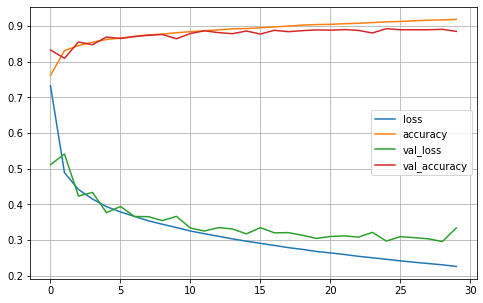

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
# plt.gca().set_ylim(0, 1) # set the vertical limit to [0, 1]
plt.show()